<a href="https://colab.research.google.com/github/pedrozanineli/covid-19-modelos-matematicos/blob/main/Covid_19_e_Modelos_Matem%C3%A1ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Covid-19 e Modelos Matemáticos**

O presente trabalho aplica conceitos de Cálculo (*) por meio da biblioteca Pandas para compreender a pandemia da Covid-19 no Brasil, do início até outubro de 2021.

O trabalho foi baseado no vídeo "Exponential growth and epidemics", do canal 3Blue1Brown, e está disponível no link: https://www.youtube.com/watch?v=Kas0tIxDvrg

(*) James Stewart - Volume 2, 7ª Edição

### **Senso comum e o crescimento exponencial**

Desde o início da pandemia - assim como em diversos outros momentos de nossas vidas -, ouvimos a expressão "crescimento exponencial", e que muitas vezes é utilizada da forma incorreta por não conseguirmos reconhecer o que de fato significa.

Em termos técnicos, o crescimento exponencial é compreendido como a multiplicação subsequente dos valores por uma constante, e que pode ser muito bem entendido com a exemplificação dos vírus, em que os novos casos são dependentes dos já existentes.

Entretanto, isso implica em um crescimento ininterrupto dos casos, quando, no caso da pandemia, deve desacelerar. Não é possível, portanto, uma nova infecção quando a mesma já exista para um indivíduo, o que levanta o questionamento: como saber quando saber quando estamos próximos a essa desaceleração?

Dessa forma, o objetivo principal deste trabalho é aplicar uma visão matemática para que seja possível solucionar a questão.


### **Pré-processamento dos dados e bibliotecas**

Como ponto de partida, faz-se necessária a utilização de bibliotecas escritas em Python que possibilitem a análise das informações que são de interesse. Para tanto, na célula seguinte a importação destas acontece.

A base de dados a ser utilizada é a atualizada pelo site Our World in Data (https://ourworldindata.org/explorers/coronavirus-data-explorer). No dia primeiro de novembro de 2021, os dados foram convertidos para um arquivo .csv e comprimidos, sendo então disponíveis no repositório do trabalho.

In [1]:
# Importação das bibliotecas a serem utilizadas

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Base de dados proveniente do https://ourworldindata.org/ (01/12/21)

urldados = 'https://github.com/pedrozanineli/estudo-covid-19/blob/main/owid-covid-data.zip?raw=true'
dfcovid = pd.read_csv(urldados, compression = 'zip')

### **Comparação entre modelos**

Levando em consideração que o modelo exponencial não é o mais adequado para representar a propagação de uma pandemia, podemos buscar outra forma de analisar a situação, levando em consideração o universo de análise.

Para tanto, um modelo que se faz adequado para a situação é a curva logística, que leva em conta uma população limite, ao mesmo tempo que detém um crescimento essencialmente exponencial no início.

Para melhor visualização dessa situação, é plotado na célula seguinte os gráficos de um crescimento exponencial e da curva logística, em que é possível observar as disparidades. Nas próximas seções, a discussão será voltada para a análise da pandemia em comparação aos modelos.

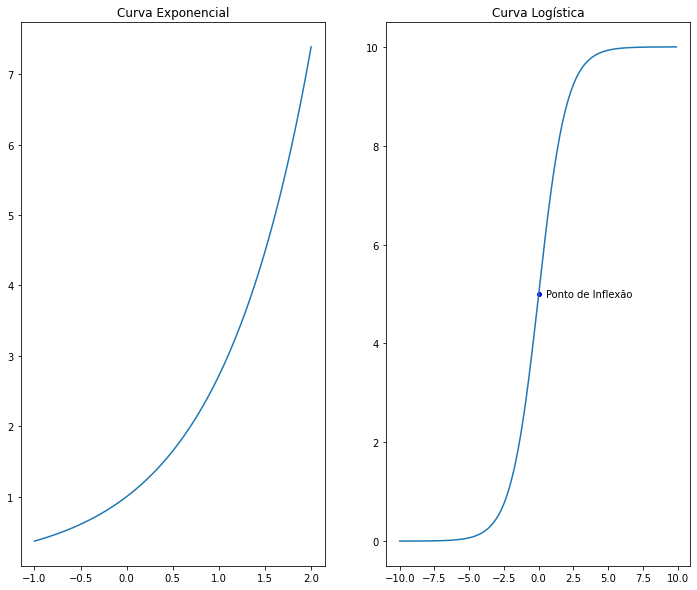

In [3]:
plt.figure(figsize=(12,10))

plt.subplot(1, 2, 1)
plt.title("Curva Exponencial")

# Função Exponencial
x = np.linspace(-1, 2, 100)
y = np.exp(x)
plt.plot(x,  y)

# Curva Logística
def logistic(x, x0, k, L):
    return L/(1+np.exp(-k*(x-x0)))
x = np.arange(start=-10, stop=10, step=0.1)  # an array from -10 to 10 with a step of 0.1

plt.subplot(1, 2, 2)
plt.title("Curva Logística")

x0 = 0  # the midpoint of the S curve is 0
L = 10  # maximum point of the curve

ks = np.arange(start=-1, stop=1.1, step=0.5) # different steepness values to plot 

f_x = logistic(x=x, x0=x0, k=1, L=L)

ypoint = logistic(x0,x0,k=1,L=L)
plt.plot(0, ypoint, marker='o', markersize=4, color="blue")

plt.text(.5,ypoint-0.07,'Ponto de Inflexão')

plt.plot(x, f_x)

plt.show()

Como analisado nas células anteriores, podemos notar como o início da curva logística é similar ao da exponencial, mas, em seguida, temos um ponto de inflexão. A partir de então, nesse exemplo, o número de novos casos em um dia para de crescer e fica aproximadamente constante, antes de diminuir.

Conhecer o ponto de inflexão pode tornar-se uma ferramenta muito útil ao passo de que, conhecendo o modelo e a tendência a ser seguida por ele, podemos ter uma noção de em que ponto da pandemia estamos.

Para tanto, podemos usar o conceito de fator de crescimento - calculado como a razão entre o número de casos em um dia e em outro -, para que possamos encontrar o ponto de inflexão.

### **Entendendo a base de dados**

Ao declarar a base de dados em uma variável, podemos utilizar o comando .head() para acessar as 5 primeiras linhas e realizar uma análise inicial, em que é possível observar que os dados estão organizados por ordem alfabética dos países, além de terem um código de identificação.

Uma vez que é possível observar que o Brasil é identificado como "BRA" por um iso_code, cria-se agora uma tabela destinada apenas às informações do país. Ao usarmos o comando "shape", é ainda possível observar as suas dimensões.

In [4]:
dfcovid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
# A coluna 'iso_code' indica o Brasil como 'BRA'

dfcovid['iso_code'].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'OWID_

In [6]:
# Gerando um DF apenas para o Brasil

dfbrasil = dfcovid[dfcovid['iso_code']=='BRA']
dfbrasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
17048,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
17049,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
17050,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
17051,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
17052,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [7]:
# Buscando as dimensões do DF

dfbrasil.shape

(644, 67)

### **Formatação e análise dos campos de data**

Para que fosse possível manipular os dados com uma maior facilidade, na célula seguinte os campos de data são configurados para o formato de ano-mês-dia, com uma maior coerência em relação às bibliotecas inicializadas, que utilizam tal padrão.

É possível ainda obter os máximos e mínimos, ou seja, o primeiro e último dia da análise, sendo, respectivamente, 26 de fevereiro de 2020 e 31 de outubro de 2021. É calculado então a diferença para visualizarmos a quantidade de dias na análise.

In [8]:
# Transformando as datas de dfbrasil (que são objetos) no formato de data

dfbrasil['date'] =  pd.to_datetime(dfbrasil['date'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Primeiro e último dia da base de dados

dfbrasil['date'].min(), dfbrasil['date'].max()

(Timestamp('2020-02-26 00:00:00'), Timestamp('2021-11-30 00:00:00'))

In [10]:
# Quantidade de dias existentes na amostra

print(dfbrasil['date'].max()-dfbrasil['date'].min())

643 days 00:00:00


### **Buscando o ponto de inflexão**

Como discutido na seção de comparação entre os modelos, podemos agora buscar na base de dados obtida o momento de crescimento máximo com base no ponto de inflexão - ou seja, quando o fator de crescimento for igual a 1.

Para tanto, como ponto de partida é primordial separar os novos casos de cada mês e armazená-los, a fim de que seja possível então analisá-los. Buscamos a quantidade de casos do último dia de um mês e subtraímos da quantidade do mês anterior, obtendo, assim, o número de casos em um mês.

In [11]:
# Armazenando os valores de casos registrados a cada mês

dataatual = dfbrasil['date'].min()
pd.to_datetime(dataatual, format="%Y-%m-%d")

casosmes=[]
auxappend = 0

while dataatual <= dfbrasil['date'].max():
  if dataatual.is_month_end == True:
    aux = auxappend
    auxappend = int(dfbrasil.loc[dfbrasil['date']==dataatual, 'total_cases'])
    
    # Como o valor registrado é do número total de casos,
    # é necessário decrescentar o valor registrado no mês anterior

    auxappend = auxappend - aux
    casosmes.append(auxappend)
  dataatual += dt.timedelta(days=1)

convmes = {
  1: 'jan',
  2: 'fev',
  3: 'mar',
  4: 'abr',
  5: 'mai',
  6: 'jun',
  7: 'jul',
  8: 'ago',
  9: 'set',
  10: 'out',
  11: 'nov',
  12: 'dez'    
}

i = 2
ano = 20

for j in casosmes:
  print(convmes[i] + " " + str(ano) + " " + str(j))
  
  if i == 12:
    i = 1
    ano = 21
    print('')
  else:
    i = i + 1

fev 20 2
mar 20 5715
abr 20 81472
mai 20 433377
jun 20 968664
jul 20 1693821
ago 20 2214451
set 20 2596484
out 20 2939121
nov 20 3396757
dez 20 4279216

jan 21 4925515
fev 21 5625744
mar 21 7123003
abr 21 7536008
mai 21 9009546
jun 21 9547595
jul 21 10370260
ago 21 10406610
set 21 11020463
out 21 10790392
nov 21 11304067


Sabendo que o ponto de inflexão será dado pelo **fator de crescimento**, calculado pela quantidade de novos casos atuais em relação a um período anterior, podemos realizar a análise de forma mensal e de maneira ainda mais precisa com os casos por dia.

No output da célula seguinte, podemos observar que os **meses 13, 15, 16 e 18** da pandemia no Brasil tiveram os fatores mais próximos a 1, indicando crescimento máximo. Com uma maior exatidão, realizando o cálculo diário, podemos observar que nos dias **22 de outubro de 2020** e **6 de maio de 2021** tivemos o crescimento máximo

Podemos inclusive observar na curva como os pontos de inflexão diários - em especial o de maio deste ano - dividem a curva em duas partes, sendo a segunda como uma tendência de estabilização.

In [12]:
i = 2
ano = 20

for j in range(len(casosmes)-1):
  
  gf = casosmes[j+1]/casosmes[j]

  if i == 12:
    i = 1
    ano = 21
  else:
    i = i + 1

  #print(gf)
  if(gf > 1.01 and gf < 1.09):
    print("Mês " + str(j) + " - " + convmes[i] + " " + str(ano) + ": " + str(gf))

Mês 13 - abr 21: 1.0579818652329642
Mês 15 - jun 21: 1.0597198793368723
Mês 16 - jul 21: 1.0861646309882227
Mês 18 - set 21: 1.0589868362511903
Mês 20 - nov 21: 1.047604850685684


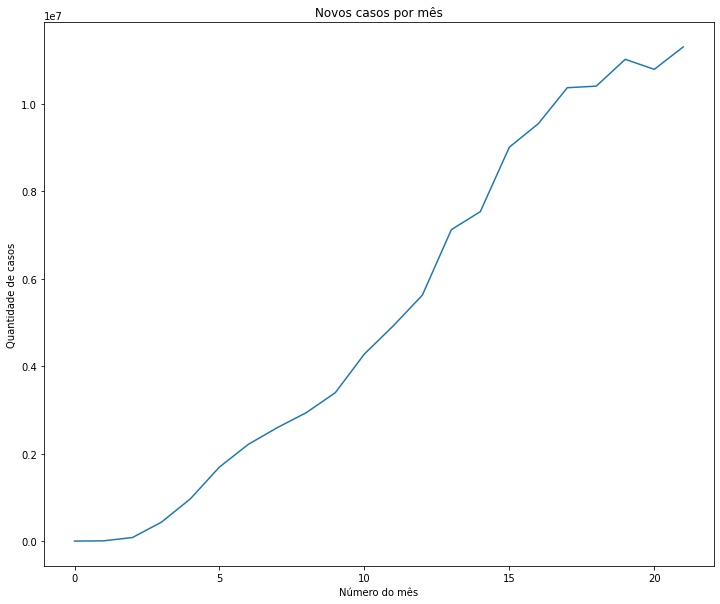

In [13]:
plt.figure(figsize=(12,10))
plt.plot(casosmes)
plt.title("Novos casos por mês")

plt.ylabel('Quantidade de casos')
plt.xlabel('Número do mês')

plt.show()

In [14]:
for j in (dfbrasil['new_cases']):
  
  if aux != 0:
    gf = j/aux
    if(gf > 1.001 and gf < 1.002):
      data = dfbrasil.loc[dfbrasil['new_cases']==j, 'date']
      # data = dt.strptime(dfbrasil.loc[dfbrasil['new_cases']==j, 'date'],'%d/%m/%y')
      print("Fator de crescimento: " + str(gf) + "\tnúmero de novos casos: " + str(j) + "\t\tnúmero da tupla e data: " + str(data))
  aux = j

Fator de crescimento: 1.0016117334192924	número de novos casos: 24858.0		número da tupla e data: 17287   2020-10-22
Name: date, dtype: datetime64[ns]
Fator de crescimento: 1.0011596971144008	número de novos casos: 73380.0		número da tupla e data: 17483   2021-05-06
Name: date, dtype: datetime64[ns]


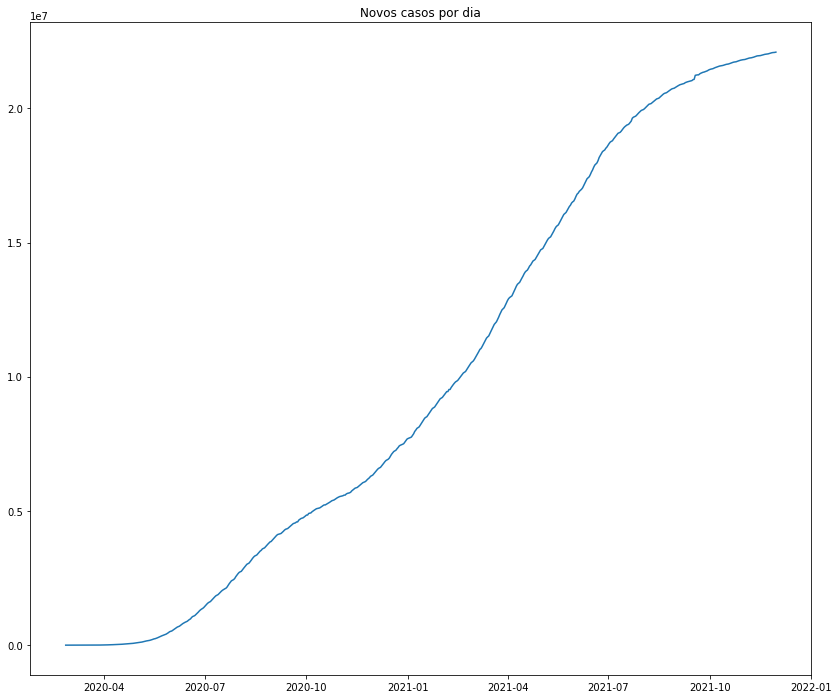

In [15]:
plt.figure(figsize=(14,12))
plt.title("Novos casos por dia")
plt.plot(dfbrasil['date'], dfbrasil['total_cases'])

plt.show()

Assim como demonstrado por Grant Sanderson no vídeo citado, é possível observar a tendência de crescimento e diminuição até estabilização, separados por um ponto de inflexão.

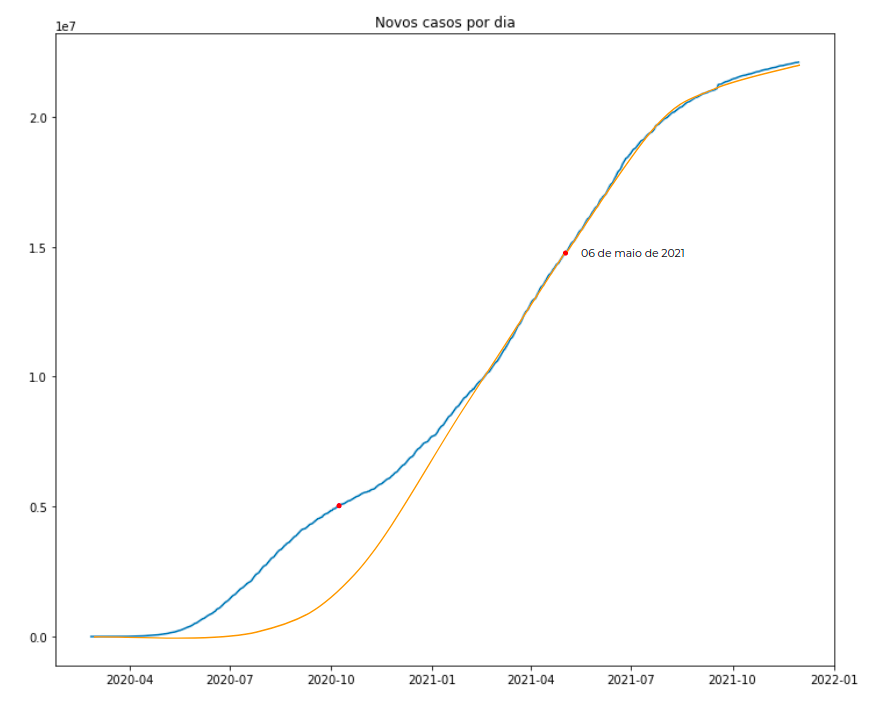

### **Conclusão**

Tendo em vista as informações expostas, é evidente a similaridade da curva logística com a dos casos registrados - em especial, com a dos casos por dia, como plotado na célula abaixo. Sendo assim, é possível observar, portanto, a necessidade da ciência atualmente, muitas vezes negligenciada nos últimos dois anos.

Apesar de observarmos agora uma tendência de estabilização dos casos atingindo uma população limite, é essencial tomarmos cuidado com as novas variantes, como é o caso da Ômicron. Não permitindo com que, apesar de os números tenderem para tal estabilização, a importância da vacinação ou uso de máscara diminua.

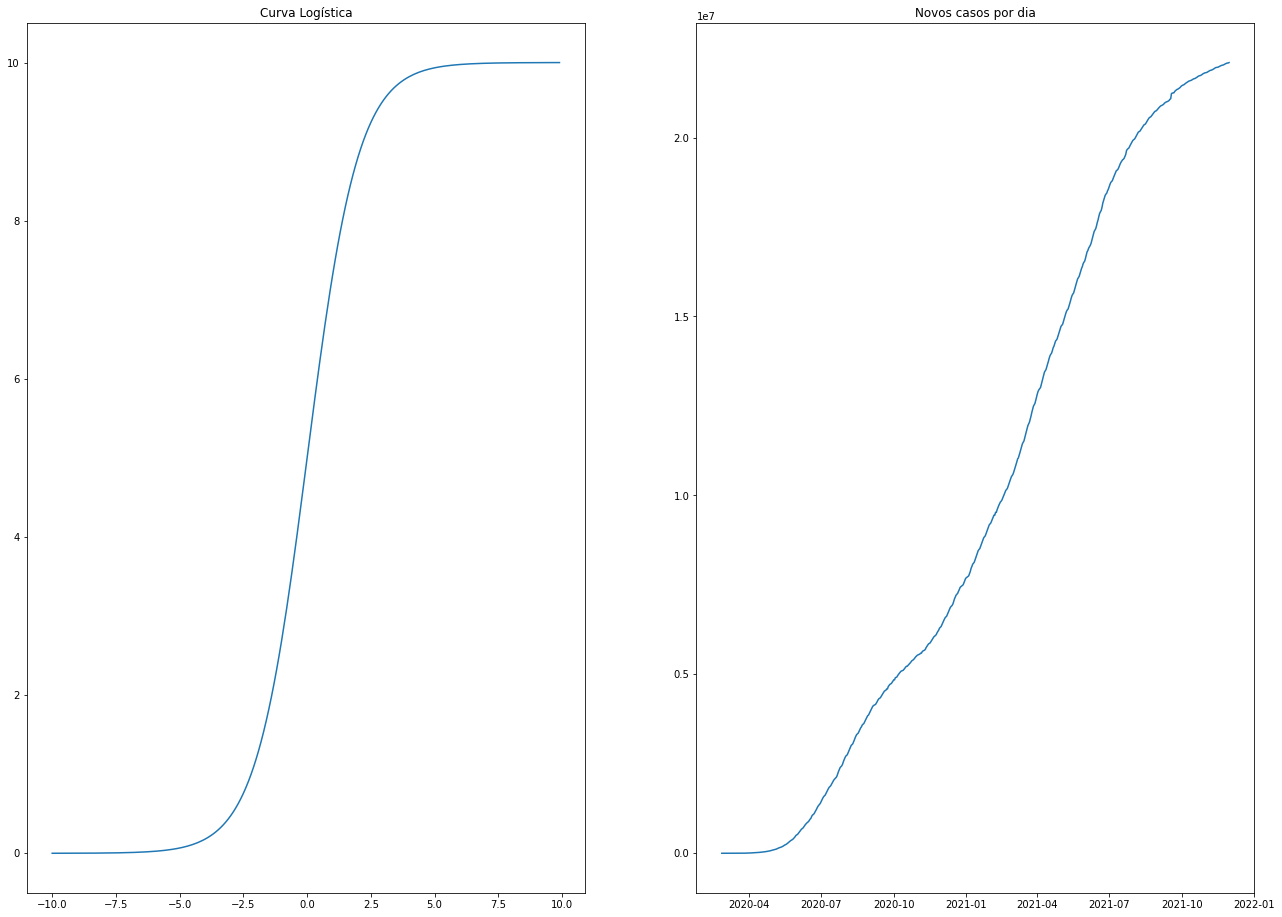

In [16]:
plt.figure(figsize=(22,16))
plt.subplot(1, 2, 1)

# Curva Logística
def logistic(x, x0, k, L):
    return L/(1+np.exp(-k*(x-x0)))
x = np.arange(start=-10, stop=10, step=0.1)  # an array from -10 to 10 with a step of 0.1

plt.title("Curva Logística")

x0 = 0  # the midpoint of the S curve is 0
L = 10  # maximum point of the curve

ks = np.arange(start=-1, stop=1.1, step=0.5) # different steepness values to plot 

f_x = logistic(x=x, x0=x0, k=1, L=L)
plt.plot(x, f_x)

plt.subplot(1, 2, 2)

plt.title("Novos casos por dia")
plt.plot(dfbrasil['date'], dfbrasil['total_cases'])

plt.show()